<h2>Data Analytics- notebook, empty template</h2>

<h4><b>Dataset name / short description:</b></h4>

<h4>Medical Cost Personal Datasets<h4>
Insurance Forecast by using Linear Regression

<h4><b>Data source (url):</b></h4>

https://www.kaggle.com/mirichoi0218/insurance

<h4><b>Data format:</b></h4>

Single CSV File

<h4><b>Data description, features and limitations:</b></h4>

The dataset is a collection of insurance costs for different people and contains information on how much they pay for their insurance. It contains 1338 rows and 7 columns which include age, sex, bmi, children, smoker status, region and charges. 

It can be considered a small dataset as there are only 1338 rows and 7 columns. The dataset is small enough to not be used for any machine learning model as of now due to the small size of the dataset.

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [15]:
# code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the data
df = pd.read_csv("INSURANCE.csv")

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h3><b>Code: Data clean-up procedure</b></h3>

Use separate markdown cells if you wish to emphasize an important point or additional information for the reader (see vehicle example)

In [17]:
# code here. create more code cells / markdown cells if needed.
# see the examples on how code cells and markdown cells can be used
# at the same time for clear explanations
# DOING ALL THE CLEANING IN SEPARATE MARKDOWN CELLS

In [18]:
# rounding all the values to 1 decimal places as to have easier readability
df = df.round(1)

In [19]:
# removing any null values from the dataset if any so that seaborn can work
df.dropna(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.5
1334,18,female,31.9,0,no,northeast,2206.0
1335,18,female,36.8,0,no,southeast,1629.8
1336,21,female,25.8,0,no,southwest,2007.9


In [20]:
# creating correlation matrix of the values to later study the data
# need to remove all the string values from the dataset to create correlation matrix
df_corr = df.drop(['sex','smoker','region'], axis=1)
df_corr

,age,bmi,children,charges
0,19,27.9,0,16884.9
1,18,33.8,1,1725.6
2,28,33.0,3,4449.5
3,33,22.7,0,21984.5
4,32,28.9,0,3866.9
...,...,...,...,...
1333,50,31.0,3,10600.5
1334,18,31.9,0,2206.0
1335,18,36.8,0,1629.8
1336,21,25.8,0,2007.9


In [21]:
corr = df_corr.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109326,0.042469,0.299008
bmi,0.109326,1.000000,0.012724,0.198538
children,0.042469,0.012724,1.000000,0.067998
charges,0.299008,0.198538,0.067998,1.000000


<h3><b>Code: Data analysis</b></h3>

Use separate markdown cells if you wish to emphasize an important point or additional information for the reader (see vehicle example)

In [22]:
# code here. create more code cells / markdown cells if needed.
# see the examples on how code cells and markdown cells can be used
# at the same time for clear explanations

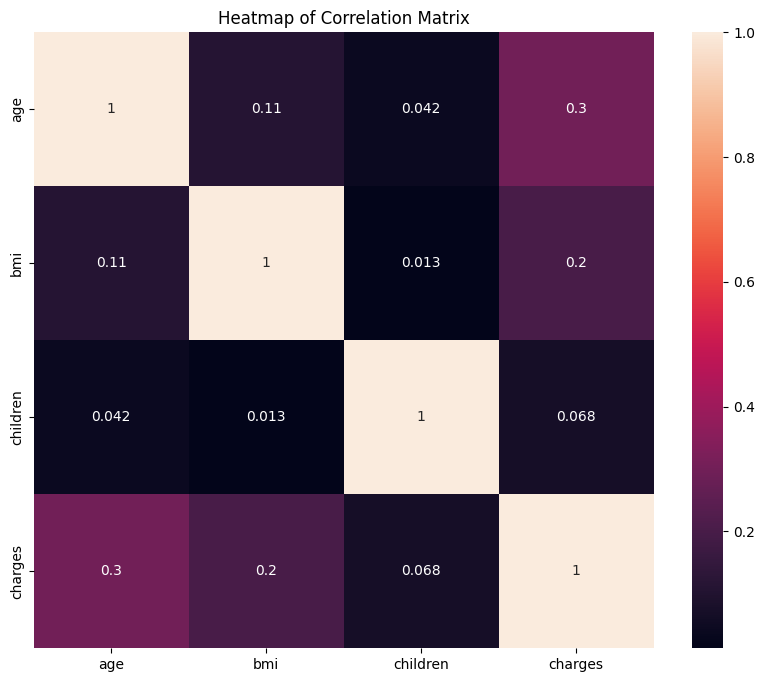

In [23]:
# checking correlation between the variables with the help of a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Pairplots help with finding out the relationship between the variables. Using different values which aren't numerical as hues, we might be able to find out the relationship between the variables.

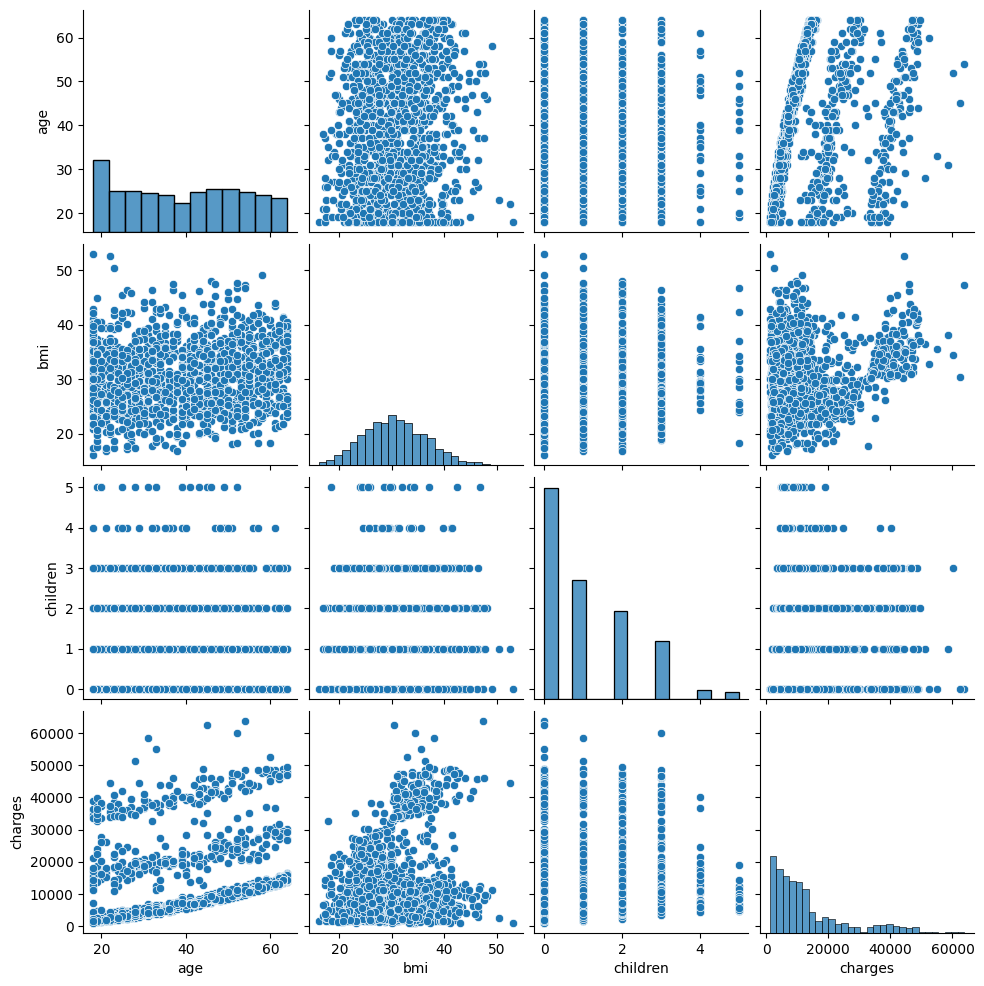

In [24]:
sns.pairplot(df)

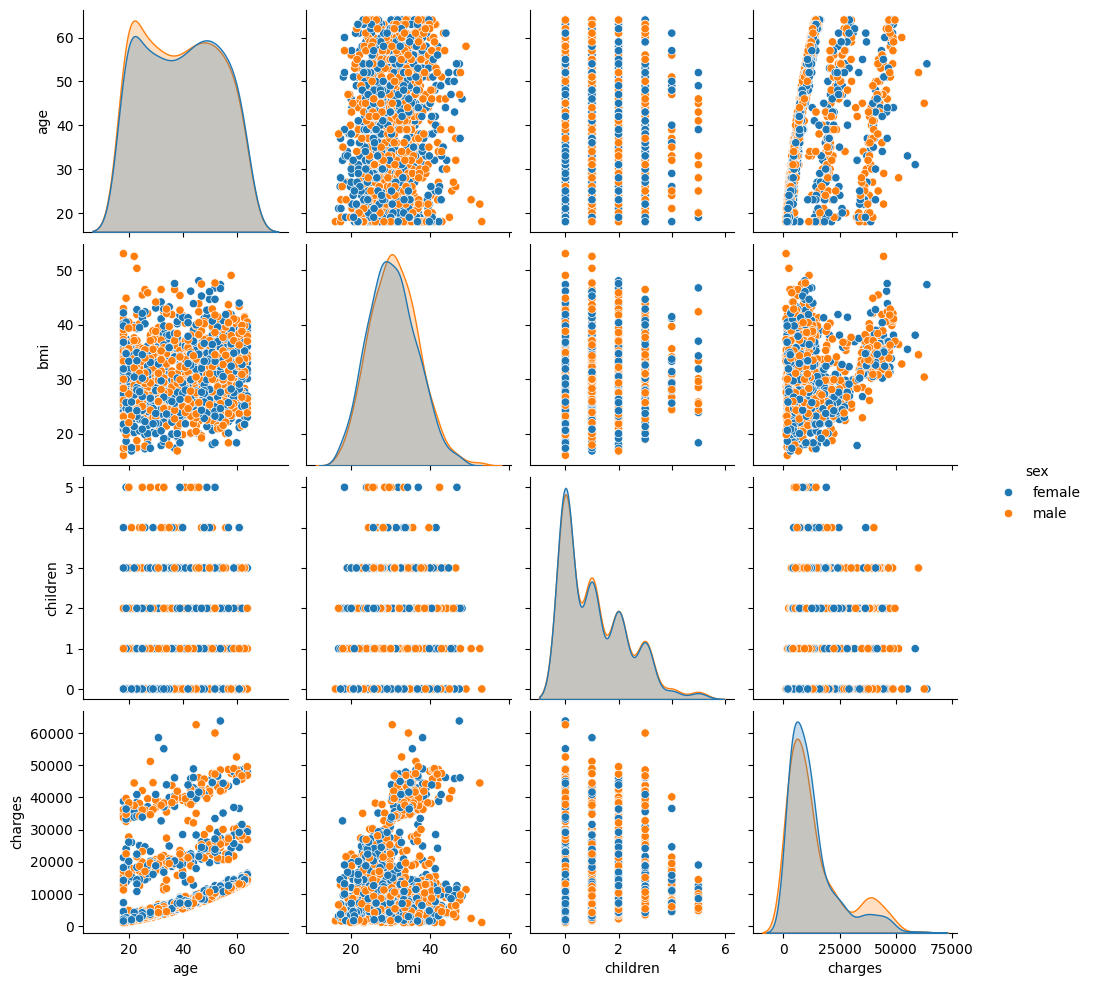

In [25]:
sns.pairplot(df , hue='sex')

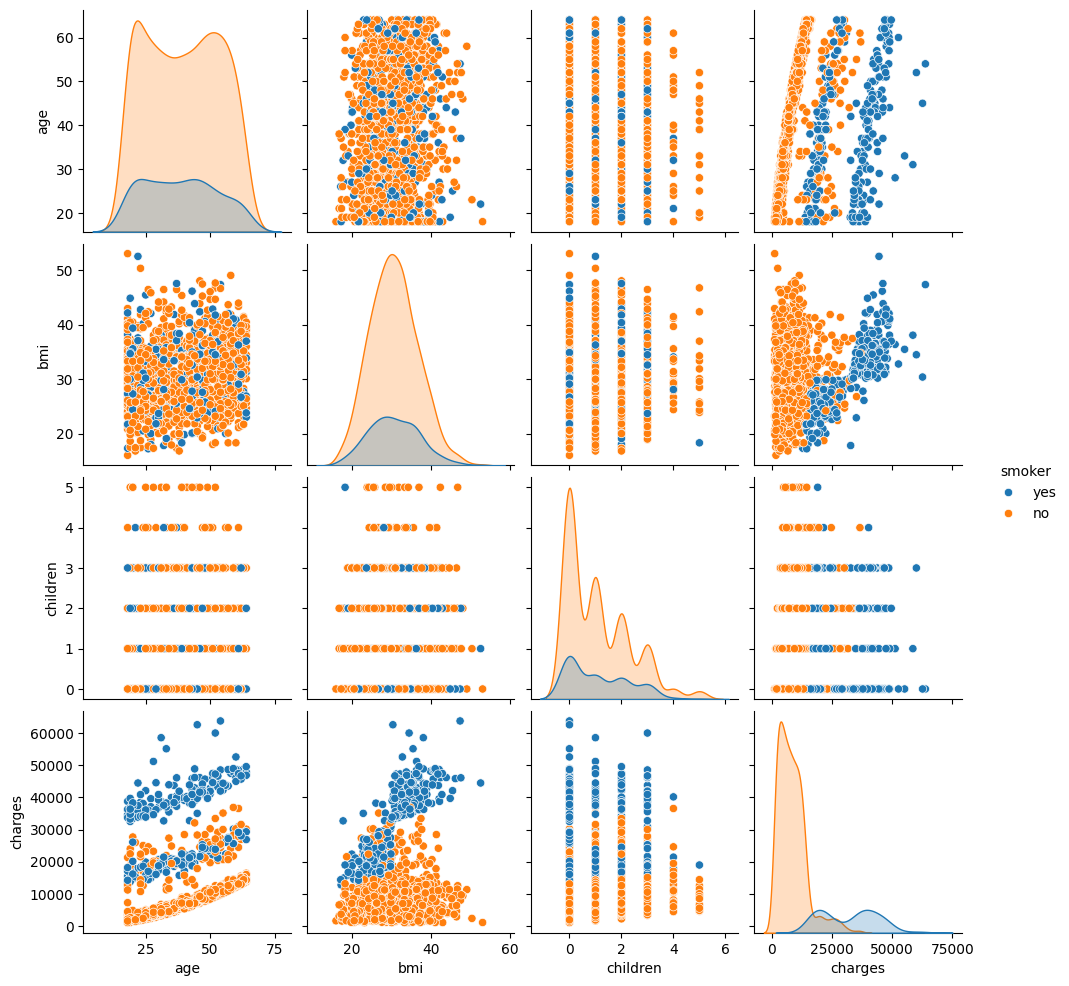

In [26]:
sns.pairplot(df , hue='smoker')

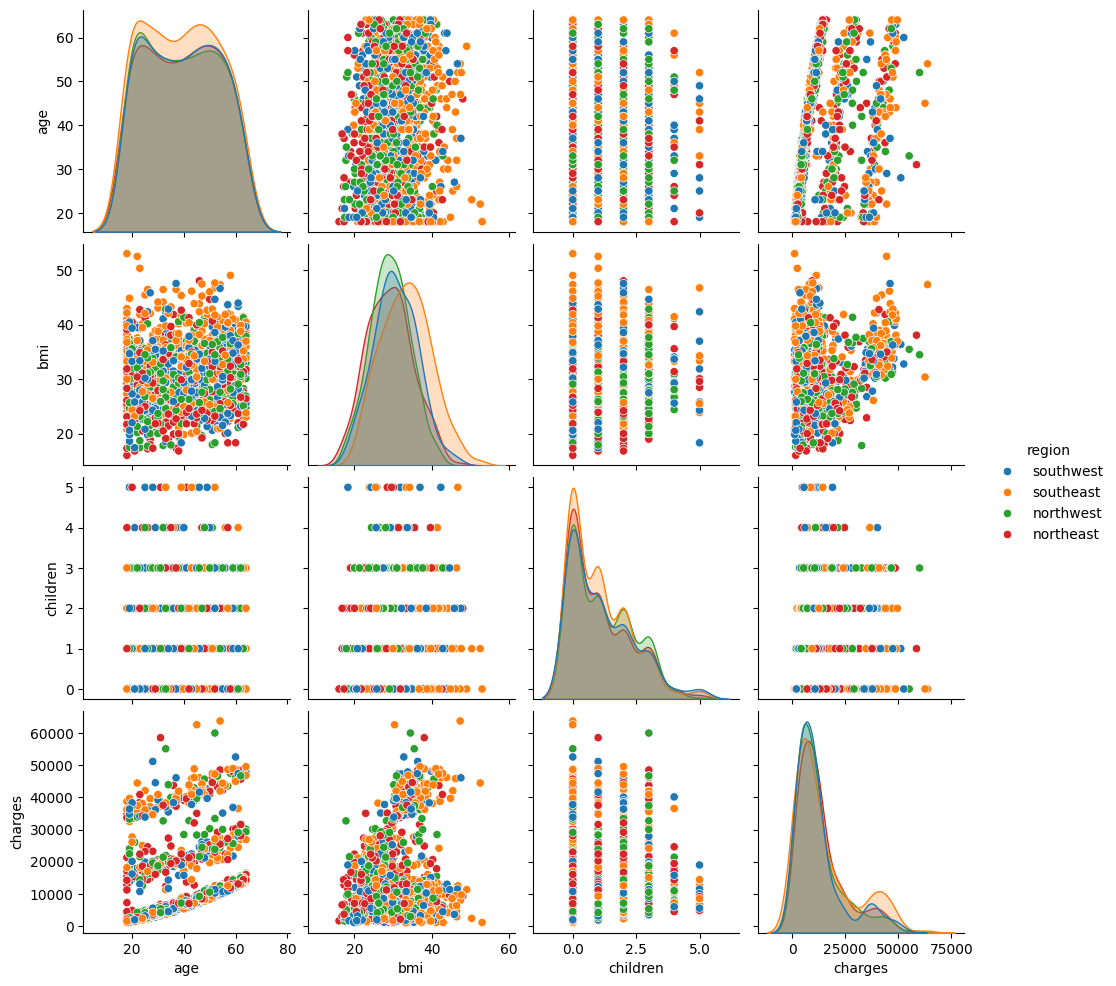

In [27]:
sns.pairplot(df , hue='region')

<Axes: xlabel='age', ylabel='charges'>

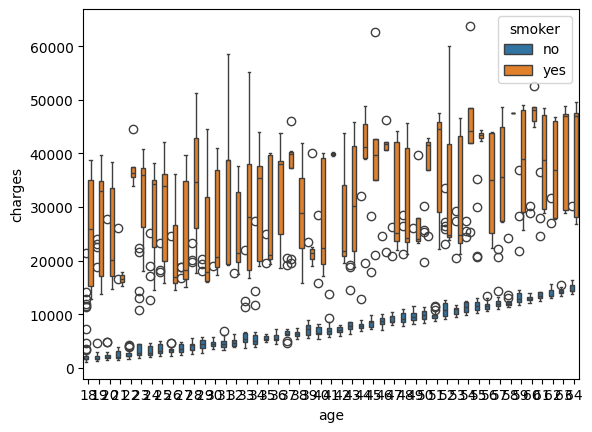

In [28]:
sns.boxplot(x='age', y='charges', data=df, hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

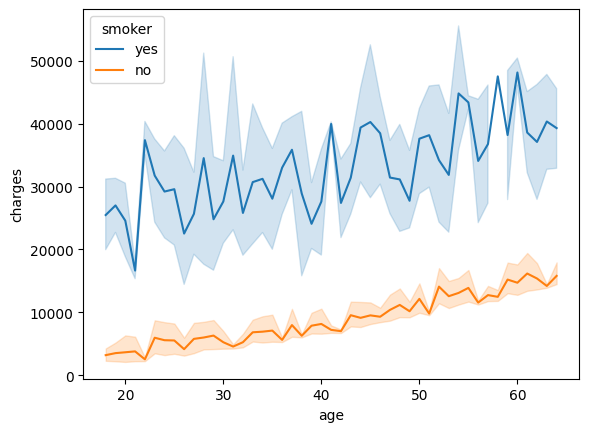

In [32]:
sns.lineplot(x='age', y='charges', data=df, hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

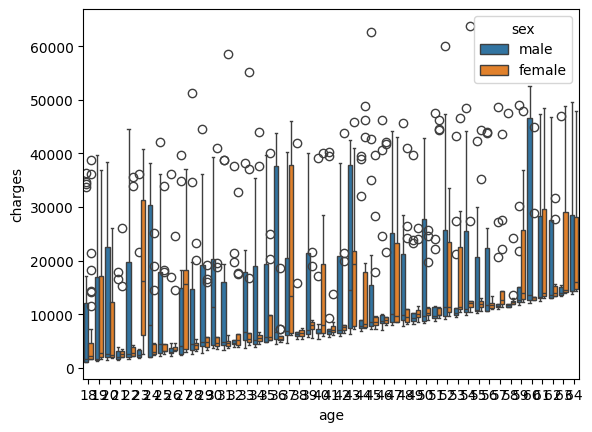

In [29]:
sns.boxplot(x='age', y='charges', data=df, hue='sex')

<Axes: xlabel='age', ylabel='charges'>

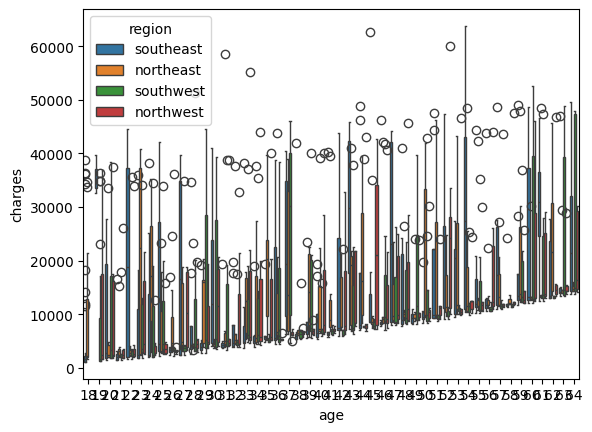

In [30]:
sns.boxplot(x='age', y='charges', data=df, hue='region')

<Axes: xlabel='children', ylabel='charges'>

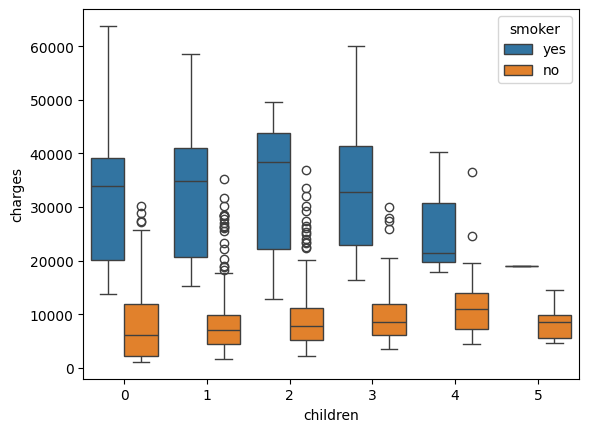

In [31]:
sns.boxplot(x='children', y='charges', data=df, hue='smoker')

<h3><b>Results and summary:</b></h3>

Write your summary and main results here. 

No correlation exist between most of the values and the dataset seems to be composed of very little relative information to correctly calculate the charges for an insurance of any new case. 

Some correlation exists between the cost of an insurance and the fact that the person is a smoker or not. Smokers tend to be charged more for their insurance as opposed to non smokers.

correlation also exists the age of the person and the cost of the insurance. The cost increases as the age of the person increases and this can clearly be seen in the boxplot, although the difference is not that big.

<h3><b>Ideas for further improvements:</b></h3>

Write your ideas here.

the dataset seems to be quite new and quite small, so it would be interesting to have more information about the dataset to be able to make correct judgments. Adding more columns that contribute to the cost of an insurance will definitely make the dataset more usable.